In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

In [16]:
from sklearn import preprocessing

def norm_func(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return x_scaled

def new_data_func(train_data,norm=False):

    new_data = train_data[["id","cycle","op1","op2","op3",'RUL']]
    new_data.loc[:,'sensor']=[columns[5]]*train_data.shape[0]
#     print(train_data[columns[5]].values)
    if norm == True:
        new_data.loc[:, 'sensor_value'] = norm_func(train_data[columns[5]].values.reshape(-1, 1))
        
    else:
        new_data.loc[:,'sensor_value']= train_data[columns[5]]
        
#     print(np.min(new_data['sensor_value']),np.max(new_data['sensor_value']))
    
    
    
    for column in columns[5:-1]:
        temp_data = train_data[["id","cycle","op1","op2","op3",'RUL']]
        temp_data.loc[:,'sensor']=[column]*train_data.shape[0];
        if norm == True:
            temp_data.loc[:, 'sensor_value']=norm_func(train_data[column].values.reshape(-1, 1));
        else:
            temp_data.loc[:,'sensor_value']=train_data[column];
            
#         print(np.min(temp_data['sensor_value']),np.max(temp_data['sensor_value']))
        new_data = pd.concat([new_data,temp_data],ignore_index=True)
    
    return new_data

In [17]:
access_color = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]

## Vizualizando os dados de treino para o motor 1

In [18]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]


train_data = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD002.txt", sep= "\s+", header = None,names=columns )

In [19]:
train_data.shape

(53759, 26)

In [20]:
train_data.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


## O modo de operação influencia no tempo de vida do motor??

In [21]:
import seaborn as sns
from pandas.plotting import radviz

In [22]:
train_data = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD002.txt", sep= "\s+", header = None,names=columns )

In [23]:
motor_2 = train_data.groupby('id').apply(add_rul)
motor_2 = new_data_func(motor_2)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [24]:
motor_2.head()

,id,cycle,op1,op2,op3,RUL,sensor,sensor_value
0,1,1,34.9983,0.8400,100.0,148,sensor1,449.44
1,1,2,41.9982,0.8408,100.0,147,sensor1,445.00
2,1,3,24.9988,0.6218,60.0,146,sensor1,462.54
3,1,4,42.0077,0.8416,100.0,145,sensor1,445.00
4,1,5,25.0005,0.6203,60.0,144,sensor1,462.54


<AxesSubplot:xlabel='op1', ylabel='op2'>

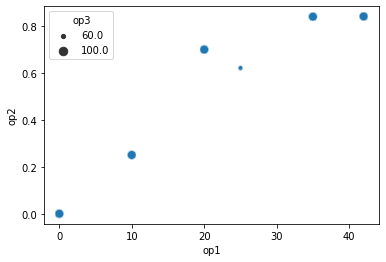

In [25]:
sns.scatterplot(data=motor_2 , x="op1", y="op2",  alpha=1,
                   size ="op3",s=5000, marker='o',  palette=access_color[3])

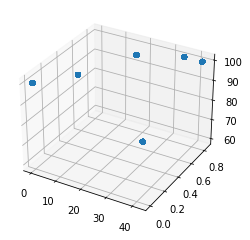

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(motor_2['op1'], motor_2['op2'], motor_2['op3'])

### Conforme descrito no dataset, são seis condições de operações diferentes. 

**Mas será que os motores submetidos à condição de operação [0,0,100] possuem duração diferente dos presentes na condição [0, 0.9,100]?**

#### Antes disso, a operação muda ao longo do voo?

In [28]:
motor_2 = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD002.txt", sep= "\s+", header = None,names=columns)

motor_2['op'] = round((motor_2['op1']+ motor_2['op2']+ motor_2['op3']),0)

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,op
id,1.000000,0.014608,-0.003084,-0.005160,0.004777,0.001659,0.003531,0.006220,0.007947,0.002592,...,0.004748,0.001573,-0.004108,0.010823,0.006432,0.004695,0.004777,0.003119,0.003103,0.000928
cycle,0.014608,1.000000,0.000039,0.000750,-0.005057,-0.001011,0.003753,0.024635,0.037108,-0.000516,...,-0.004331,0.071592,0.035143,0.067857,0.025085,-0.004642,-0.005057,-0.006865,-0.006766,-0.003461
op1,-0.003084,0.000039,1.000000,0.943005,-0.028488,-0.964414,-0.867452,-0.787862,-0.840737,-0.987344,...,-0.028653,-0.263387,0.460837,-0.838749,-0.790552,-0.443924,-0.028488,-0.962036,-0.962058,0.721866
op2,-0.005160,0.000750,0.943005,1.000000,-0.065350,-0.884061,-0.808822,-0.759658,-0.836673,-0.932606,...,-0.065437,-0.355461,0.520009,-0.888615,-0.762704,-0.438600,-0.065350,-0.920772,-0.920777,0.657181
op3,0.004777,-0.005057,-0.028488,-0.065350,1.000000,0.164334,0.480073,0.620839,0.544563,0.113635,...,0.999998,0.927377,-0.884175,0.295212,0.617185,0.902999,1.000000,0.276544,0.276479,0.671105
sensor1,0.001659,-0.001011,-0.964414,-0.884061,0.164334,1.000000,0.944089,0.870963,0.898002,0.986372,...,0.164474,0.352782,-0.542743,0.793789,0.873265,0.572171,0.164334,0.977703,0.977718,-0.599636
sensor2,0.003531,0.003753,-0.867452,-0.808822,0.480073,0.944089,1.000000,0.982225,0.981047,0.915808,...,0.480202,0.623963,-0.777953,0.805280,0.983065,0.810312,0.480073,0.962425,0.962416,-0.309369
sensor3,0.006220,0.024635,-0.787862,-0.759658,0.620839,0.870963,0.982225,1.000000,0.989565,0.842951,...,0.620970,0.751865,-0.875928,0.804821,0.998680,0.895446,0.620839,0.917144,0.917125,-0.153734
sensor4,0.007947,0.037108,-0.840737,-0.836673,0.544563,0.898002,0.981047,0.989565,1.000000,0.884242,...,0.544693,0.715493,-0.846726,0.859130,0.990213,0.843647,0.544563,0.946478,0.946469,-0.246746
sensor5,0.002592,-0.000516,-0.987344,-0.932606,0.113635,0.986372,0.915808,0.842951,0.884242,1.000000,...,0.113778,0.330514,-0.525384,0.824095,0.845626,0.523827,0.113635,0.985714,0.985727,-0.652809


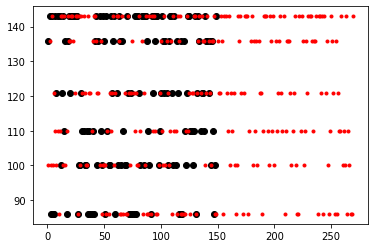

In [29]:
plt.plot(motor_2[motor_2.id==1]['cycle'].values,motor_2[motor_2.id==1]['op'].values,"ok")
plt.plot(motor_2[motor_2.id==2]['cycle'].values,motor_2[motor_2.id==2]['op'].values,".r")
motor_2.corr()

In [ ]:
motor_2.head()

In [30]:
train_data = train_data.groupby('id').apply(add_rul)
motor_2 = train_data.groupby('id').max().reset_index()
motor_2.shape

(260, 27)

In [31]:
motor_2['op'] = round((motor_2['op1']+ motor_2['op2']+ motor_2['op3']),0).astype(str)
motor_2.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,op
0,1,149,42.0077,0.8419,100.0,518.67,643.73,1607.03,1429.43,14.62,...,8128.64,10.9764,0.03,397,2388,100.0,39.04,23.3464,148,143.0
1,2,269,42.0076,0.8420,100.0,518.67,643.87,1602.29,1427.57,14.62,...,8161.78,11.0400,0.03,397,2388,100.0,39.07,23.4306,268,143.0
2,3,206,42.0075,0.8420,100.0,518.67,644.04,1603.90,1425.68,14.62,...,8145.24,11.0174,0.03,397,2388,100.0,39.11,23.4735,205,143.0
3,4,235,42.0079,0.8419,100.0,518.67,644.38,1609.27,1428.21,14.62,...,8215.14,11.0346,0.03,397,2388,100.0,39.13,23.4181,234,143.0
4,5,154,42.0071,0.8420,100.0,518.67,643.29,1601.04,1423.44,14.62,...,8188.34,11.0547,0.03,396,2388,100.0,39.09,23.4725,153,143.0


In [32]:
sns.histplot(motor_2_max, x='cycle', hue = "op", color= access_color)

NameError: name 'motor_2_max' is not defined

In [33]:
motor_2['op1_bin'].values

KeyError: 'op1_bin'

In [34]:
color=access_color
fig = plt.figure(figsize = (6,5),dpi = 300)

#Visualization of emissions from all sectors in a single 4D scatter plot
radviz(train[['op1','op2','op3']])
# plt.legend(loc='upper left', ncol=1,fontsize=10)

NameError: name 'train' is not defined

<Figure size 1800x1500 with 0 Axes>

<AxesSubplot:xlabel='op2', ylabel='Count'>

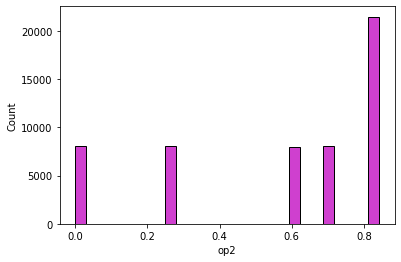

In [35]:
sns.histplot(train_data, x='op2',color= 'm')

In [36]:
train.corr()

NameError: name 'train' is not defined

In [37]:
import plotly.figure_factory as ff
import numpy as np


hist_data = [train_data['op2'].values]
group_labels = ['op1'] # name of the dataset

# fig = ff.create_distplot(hist_data, group_labels)
# fig.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [38]:
import plotly.express as px
fig = px.histogram(train_data, y='op2')
fig.show()

In [39]:
print(train_data.mean())

id           131.082981
cycle        109.154746
op1           23.998407
op2            0.572056
op3           94.046020
sensor1      472.910207
sensor2      579.672399
sensor3     1419.971013
sensor4     1205.442024
sensor5        8.031986
sensor6       11.600746
sensor7      282.606787
sensor8     2228.879188
sensor9     8525.200837
sensor10       1.094962
sensor11      42.985172
sensor12     266.069034
sensor13    2334.557253
sensor14    8066.597682
sensor15       9.329654
sensor16       0.023326
sensor17     348.309511
sensor18    2228.806358
sensor19      97.756838
sensor20      20.789296
sensor21      12.473423
RUL          108.154746
dtype: float64


(0.0, 500.0)

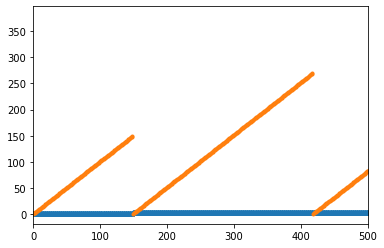

In [40]:
plt.plot(train_data.id,'*')
plt.plot(train_data.cycle,'.')
plt.xlim([0,500])

In [51]:
train_data.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


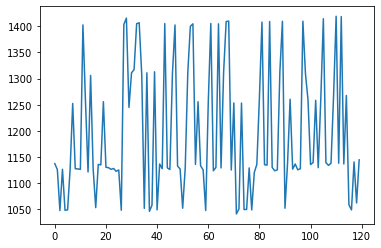

In [68]:
plt.plot(train_data.sensor4.values[0:120])
# plt.plot(train_data.id[0:500],'.')

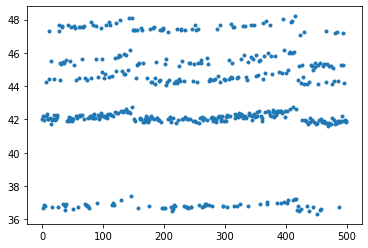

In [53]:
# plt.plot('*')
plt.plot(train_data.index[0:500],train_data.sensor11[0:500],'.')

(0.0, 2000.0)

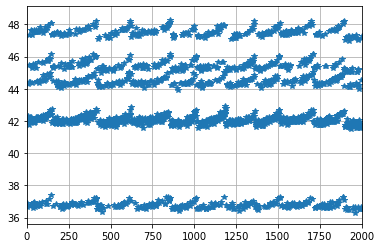

In [75]:
plt.plot(train_data.sensor11,'*')
plt.grid()
plt.xlim([0,2000])

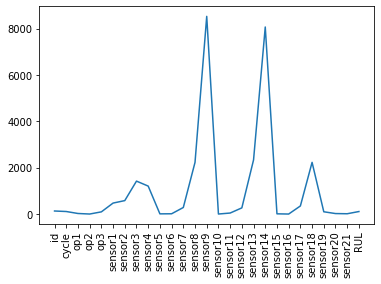

In [76]:
# for column in columns:
plt.plot(train_data.mean())
plt.xticks(rotation = 90);   
# plt.ylim([0,400])

## Adicionando RUL

In [77]:
train = train_data.groupby('id').apply(add_rul)

In [78]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


In [79]:
train_max = train.groupby('id').max()

train_max.head()

,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
id,,,,,,,,,,,,,,,,,,,,,
1,149,42.0077,0.8419,100.0,518.67,643.73,1607.03,1429.43,14.62,21.61,...,2388.43,8128.64,10.9764,0.03,397,2388,100.0,39.04,23.3464,148
2,269,42.0076,0.8420,100.0,518.67,643.87,1602.29,1427.57,14.62,21.61,...,2388.53,8161.78,11.0400,0.03,397,2388,100.0,39.07,23.4306,268
3,206,42.0075,0.8420,100.0,518.67,644.04,1603.90,1425.68,14.62,21.61,...,2388.36,8145.24,11.0174,0.03,397,2388,100.0,39.11,23.4735,205
4,235,42.0079,0.8419,100.0,518.67,644.38,1609.27,1428.21,14.62,21.61,...,2389.32,8215.14,11.0346,0.03,397,2388,100.0,39.13,23.4181,234
5,154,42.0071,0.8420,100.0,518.67,643.29,1601.04,1423.44,14.62,21.61,...,2389.25,8188.34,11.0547,0.03,396,2388,100.0,39.09,23.4725,153


In [80]:
import plotly.figure_factory as ff
import numpy as np


hist_data = [train['op3'].values]
group_labels = ['op1'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(train_max, y='op1')
fig.show()

In [ ]:
(100*(train[train.cycle<=10].groupby('id').mean()-train[train.RUL<=0].groupby('id').mean())/train[train.cycle<=10].groupby('id').mean()).describe().transpose()

## Avaliando potenciais diferenças entre as medições dos sensores nos ciclos iniciais

In [ ]:
import plotly.express as px

### Sem normalizar os dados

In [ ]:
new_data = new_data_func(train_data);

fig = px.box(new_data[new_data.cycle==1], x="sensor_value", color="sensor");
fig.show()

In [ ]:
new_data.head()

## Normalizando os dados

In [ ]:
new_data.min()

In [ ]:
new_data = new_data_func(train_data, norm=True);

In [ ]:
fig = px.box(new_data[new_data.cycle==1], x="sensor_value", color="sensor");
fig.show()

In [ ]:
fig = px.scatter(new_data[new_data.cycle<=10], x="sensor_value", y= 'id', color ="sensor");
fig.show()

In [ ]:
fig = px.scatter(new_data[new_data.sensor=='sensor17'], x="sensor_value", y= 'id', color ="cycle");
fig.show()

In [ ]:
train_data[columns[5:]].corr()

In [ ]:
new_data.head()

In [ ]:
print(new_data.mean())

In [ ]:
train[train.cycle<=10].corr()["RUL"]